<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week5.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
from torch import nn,optim
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchLearning import *

import matplotlib.pyplot as plt

In [11]:
# 设置随机数种子
torch.manual_seed(420)  

# 创建最高项为2的多项式回归数据集
features, labels = tensorGenReg(w=[2, -1], bias=False, deg=2)

# 进行数据集切分与加载
train_loader, test_loader = split_loader(features, labels)

In [12]:
class Relu_class3(nn.Module):
  def __init__(self,in_features=2,n_hidden1=4,n_hidden2=4,n_hidden3=4,out_features=1,bias=True):
    super(Relu_class3,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden1)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2)
    self.linear3 = nn.Linear(n_hidden2,n_hidden3)
    self.linear4 = nn.Linear(n_hidden3,out_features)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.relu(z1)
    z2 = self.linear2(p1)
    p2 = torch.relu(z2)
    z3 = self.linear3(p2)
    p3 = torch.relu(z3)
    out = self.linear4(p3)
    return out

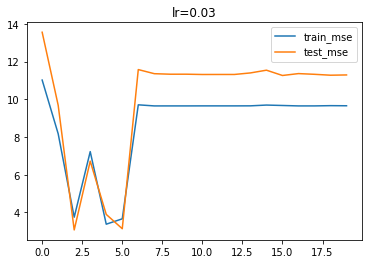

In [22]:
torch.manual_seed(24)

num_epochs = 20
lr = 0.03

relu_model3 = Relu_class3()

train_l, test_l = model_train_test(
    relu_model3,
    train_loader,
    test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal

)
plt.plot(list(range(num_epochs)),train_l,label="train_mse")
plt.plot(list(range(num_epochs)),test_l,label="test_mse")
plt.title("lr=0.03")
plt.legend(loc=1)

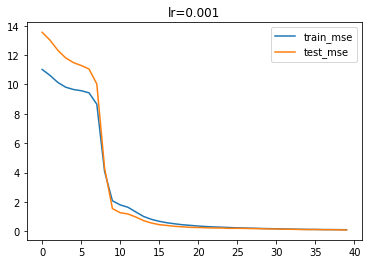

In [21]:
torch.manual_seed(24)

num_epochs = 40
lr = 0.001

relu_model3 = Relu_class3()

train_l, test_l = model_train_test(
    relu_model3,
    train_loader,
    test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal

)
plt.plot(list(range(num_epochs)),train_l,label="train_mse")
plt.plot(list(range(num_epochs)),test_l,label="test_mse")
plt.title("lr=0.001")
plt.legend(loc=1)

降低学习率会防止神经元失活现象

##<font color ="orange">**nn.Sewuential快速建模方法及nn.init模型参数自定义方法**

###**1. nn.Sequential快速建模方法介绍**

In [23]:
torch.manual_seed(25)

relu_test = nn.Sequential(
    nn.Linear(2,2,bias=False),
    nn.ReLU(), # 必须调用nn模块中的函数进行处理
    nn.Linear(2,1,bias=False)
)   # 此时relu_test相当于已经实例化之后的模型

# 不方便调用，且复杂结构Sequential可能会比较麻烦

In [24]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0.3561, -0.4343],
         [-0.6182,  0.5823]], requires_grad=True), Parameter containing:
 tensor([[-0.1658, -0.2843]], requires_grad=True)]

###**2. 模型参数自定义方法**（适用于创建服从特殊、具备一定特性、能够辅助模型迭代收敛的初始参数）

In [25]:
relu_test.parameters() # parameters()返回的是一个生成器

<generator object Module.parameters at 0x7f9ae9ef0820>

In [26]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0.3561, -0.4343],
         [-0.6182,  0.5823]], requires_grad=True), Parameter containing:
 tensor([[-0.1658, -0.2843]], requires_grad=True)]

In [29]:
list(relu_test.parameters())[0].data  # 可以对data直接修改，注意要转置

tensor([[ 0.3561, -0.4343],
        [-0.6182,  0.5823]])

In [30]:
torch.manual_seed(25)

relu_test = nn.Sequential(
    nn.Linear(2,2,bias=False),
    nn.ReLU(), 
    nn.Linear(2,1,bias=False)
)   


In [31]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0.3561, -0.4343],
         [-0.6182,  0.5823]], requires_grad=True), Parameter containing:
 tensor([[-0.1658, -0.2843]], requires_grad=True)]

####2.1 nn.init.uniform_方法，新生成的参数服从均匀分布

In [33]:
nn.init.uniform_(list(relu_test.parameters())[0],0,1)  # 输入的原参数必须是张量形式，设置参数为均匀分布0，1区间的随机数

Parameter containing:
tensor([[0.0481, 0.3497],
        [0.3520, 0.9528]], requires_grad=True)

带有下划线的函数都是能够直接修改对象本身的函数

####2.2 nn.init.normal_方法，新生成的参数服从正态分布

In [34]:
nn.init.normal_(list(relu_test.parameters())[0],0,1)

Parameter containing:
tensor([[ 0.0827,  0.5799],
        [ 0.0578, -0.2979]], requires_grad=True)

####2.3 nn.init.constant_方法，新生成的参数为常值

In [35]:
nn.init.constant_(list(relu_test.parameters())[0],1)

Parameter containing:
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)